In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib.cm as cm

Cameraman.png shape: (256, 256, 3)
Data type: uint8


(-0.5, 255.5, 255.5, -0.5)

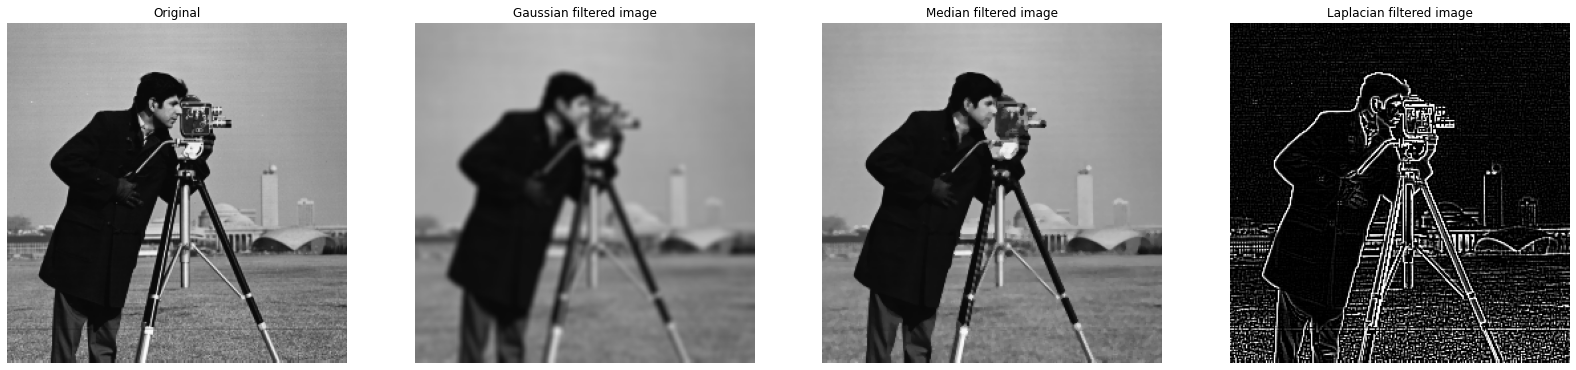

In [2]:
im = cv.imread('./data/cameraman.png')
print(f'Cameraman.png shape: {im.shape}')
print(f'Data type: {im.dtype}')

gaussian = cv.GaussianBlur(src=im, ksize=(7,7), sigmaX=2, sigmaY=2, borderType=cv.BORDER_REFLECT_101)
median = cv.medianBlur(src=im, ksize=3)
laplacian = cv.Laplacian(src=im, ddepth=cv.CV_8U, ksize=3, scale=1, borderType=cv.BORDER_REFLECT_101)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(28,7))
ax0.imshow(im)
ax0.set_title('Original')
ax0.axis('off')
ax1.imshow(gaussian)
ax1.set_title('Gaussian filtered image')
ax1.axis('off')
ax2.imshow(median)
ax2.set_title('Median filtered image')
ax2.axis('off')
ax3.imshow(laplacian)
ax3.set_title('Laplacian filtered image')
ax3.axis('off')


(-0.5, 255.5, 255.5, -0.5)

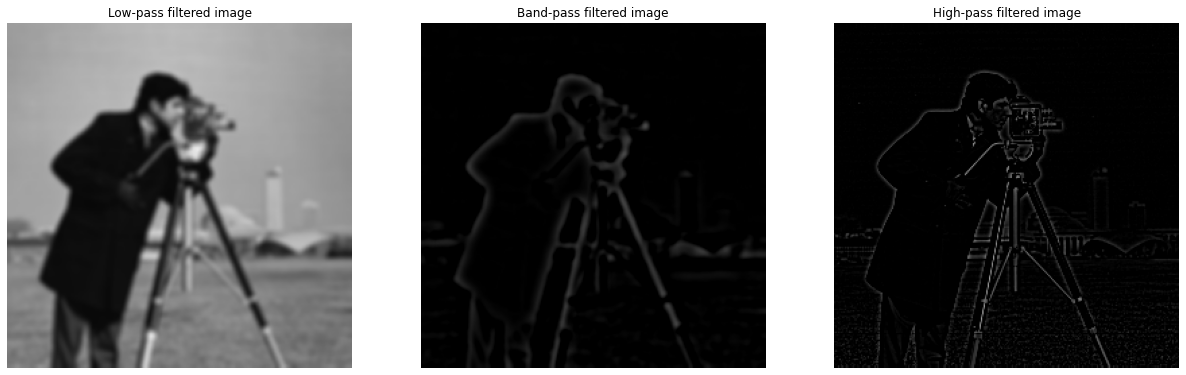

In [3]:
low_pass_small = cv.GaussianBlur(src=im, ksize=(7,7), sigmaX=2, sigmaY=2, borderType=cv.BORDER_REFLECT_101)
low_pass_large = cv.GaussianBlur(src=im, ksize=(21,21), sigmaX=5, sigmaY=5, borderType=cv.BORDER_REFLECT_101)
band_pass = cv.subtract(src1=low_pass_large, src2=low_pass_small)
high_pass = cv.subtract(src1=im, src2=low_pass_small)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(21,7))
ax0.imshow(low_pass_small)
ax0.set_title('Low-pass filtered image')
ax0.axis('off')
ax1.imshow(band_pass)
ax1.set_title('Band-pass filtered image')
ax1.axis('off')
ax2.imshow(high_pass)
ax2.set_title('High-pass filtered image')
ax2.axis('off')

(-0.5, 255.5, 255.5, -0.5)

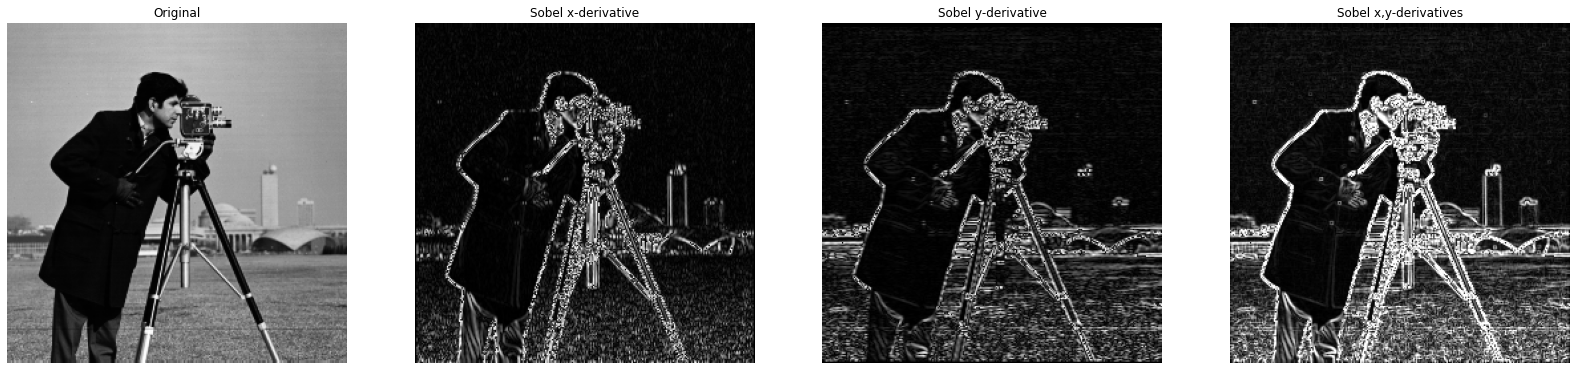

In [10]:
im = cv.imread('./data/cameraman.png')
im = cv.cvtColor(src=im, code=cv.COLOR_RGB2GRAY)
sobel_x = cv.Sobel(src=im, ddepth=cv.CV_64F, dx=1, dy=0, ksize=3)
sobel_x = np.uint8(np.absolute(sobel_x))
sobel_y = cv.Sobel(src=im, ddepth=cv.CV_64F, dx=0, dy=1, ksize=3)
sobel_y = np.uint8(np.absolute(sobel_y))
sobel_xy = cv.add(sobel_x, sobel_y)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(28,7))
ax0.imshow(im, cmap=cm.gray)
ax0.set_title('Original')
ax0.axis('off')
ax1.imshow(sobel_x, cmap=cm.gray)
ax1.set_title('Sobel x-derivative')
ax1.axis('off')
ax2.imshow(sobel_y, cmap=cm.gray)
ax2.set_title('Sobel y-derivative')
ax2.axis('off')
ax3.imshow(sobel_xy, cmap=cm.gray)
ax3.set_title('Sobel x,y-derivatives')
ax3.axis('off')

(-0.5, 393.5, 259.5, -0.5)

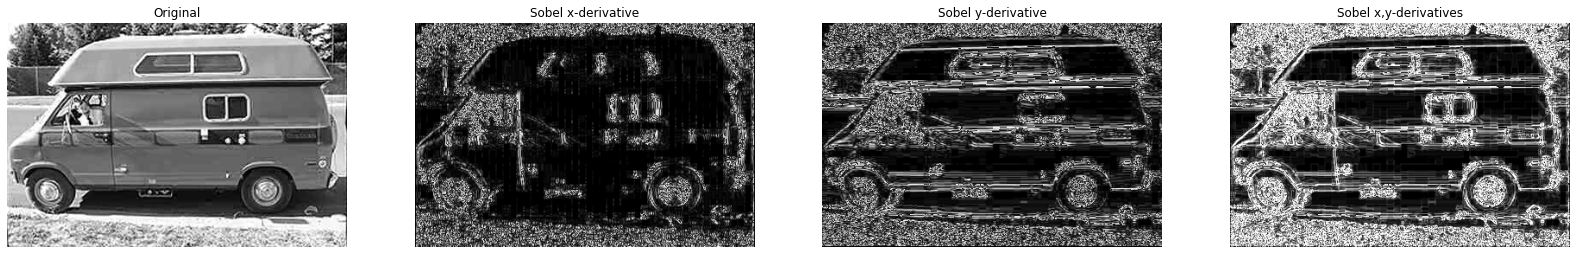

In [11]:
im = cv.imread('./data/wagon.png')
im = cv.cvtColor(src=im, code=cv.COLOR_RGB2GRAY)
sobel_x = cv.Sobel(src=im, ddepth=cv.CV_64F, dx=1, dy=0, ksize=3)
sobel_x = np.uint8(np.absolute(sobel_x))
sobel_y = cv.Sobel(src=im, ddepth=cv.CV_64F, dx=0, dy=1, ksize=3)
sobel_y = np.uint8(np.absolute(sobel_y))
sobel_xy = cv.add(sobel_x, sobel_y)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(28,7))
ax0.imshow(im, cmap=cm.gray)
ax0.set_title('Original')
ax0.axis('off')
ax1.imshow(sobel_x, cmap=cm.gray)
ax1.set_title('Sobel x-derivative')
ax1.axis('off')
ax2.imshow(sobel_y, cmap=cm.gray)
ax2.set_title('Sobel y-derivative')
ax2.axis('off')
ax3.imshow(sobel_xy, cmap=cm.gray)
ax3.set_title('Sobel x,y-derivatives')
ax3.axis('off')

Wagon.png shape: (260, 394, 3)
Data type: uint8


(-0.5, 393.5, 259.5, -0.5)

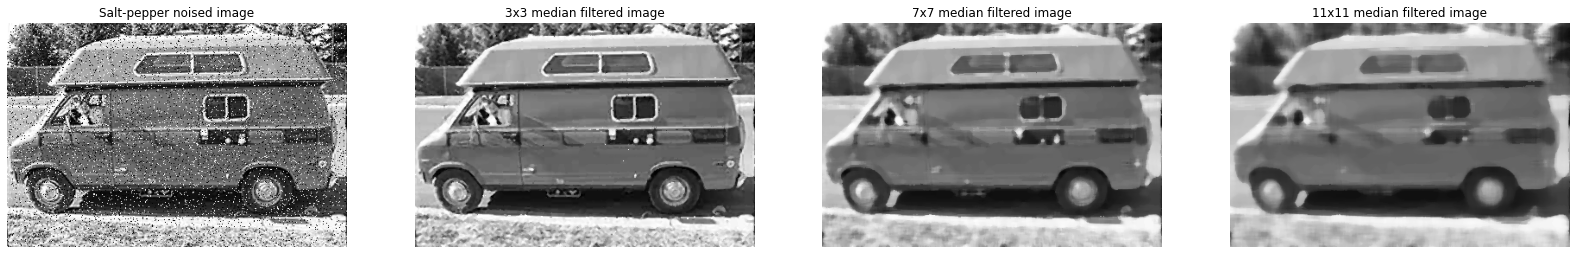

In [4]:
im = cv.imread('./data/wagon_shot_noise.png')
print(f'Wagon.png shape: {im.shape}')
print(f'Data type: {im.dtype}')

median_small = cv.medianBlur(src=im, ksize=3)
median_medium = cv.medianBlur(src=im, ksize=7)
median_large = cv.medianBlur(src=im, ksize=11)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(28,5))
ax0.imshow(im)
ax0.set_title('Salt-pepper noised image')
ax0.axis('off')
ax1.imshow(median_small)
ax1.set_title('3x3 median filtered image')
ax1.axis('off')
ax2.imshow(median_medium)
ax2.set_title('7x7 median filtered image')
ax2.axis('off')
ax3.imshow(median_large)
ax3.set_title('11x11 median filtered image')
ax3.axis('off')

Wagon.png shape: (260, 394, 3)
Data type: uint8


(-0.5, 393.5, 259.5, -0.5)

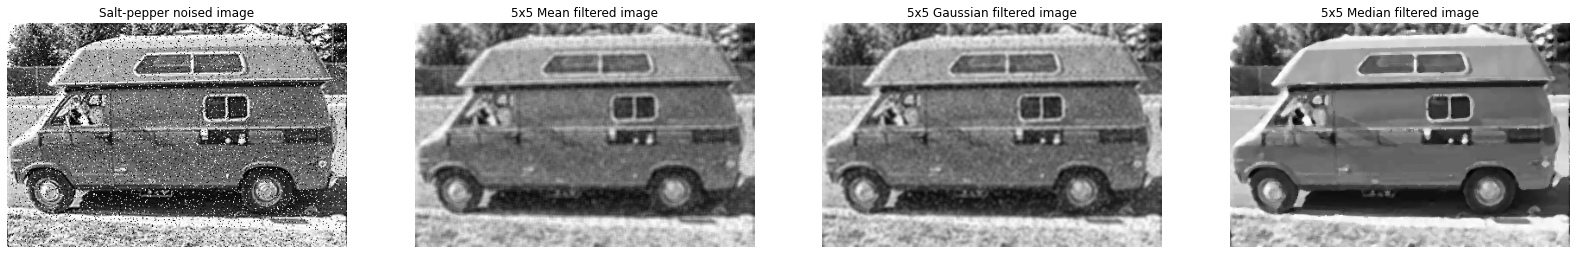

In [6]:
im = cv.imread('./data/wagon_shot_noise.png')
print(f'Wagon.png shape: {im.shape}')
print(f'Data type: {im.dtype}')

mean_kernel = np.full((5,5), 1/25)
mean = cv.filter2D(src=im, ddepth=cv.CV_8U, kernel=mean_kernel, anchor=(-1,-1), borderType=cv.BORDER_REFLECT_101)
gaussian = cv.GaussianBlur(src=im, ksize=(5,5), sigmaX=2, sigmaY=2, borderType=cv.BORDER_REFLECT_101)
median = cv.medianBlur(src=im, ksize=5)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(28,5))
ax0.imshow(im)
ax0.set_title('Salt-pepper noised image')
ax0.axis('off')
ax1.imshow(mean)
ax1.set_title('5x5 Mean filtered image')
ax1.axis('off')
ax2.imshow(gaussian)
ax2.set_title('5x5 Gaussian filtered image')
ax2.axis('off')
ax3.imshow(median)
ax3.set_title('5x5 Median filtered image')
ax3.axis('off')

(-0.5, 393.5, 259.5, -0.5)

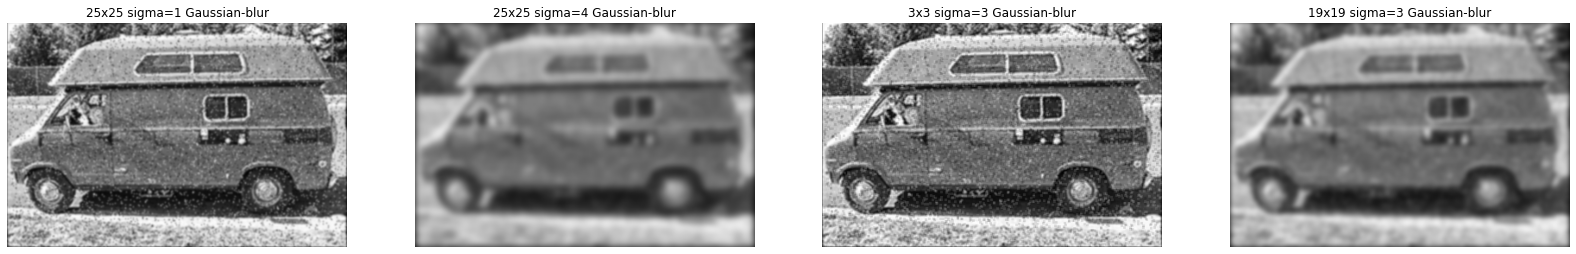

In [7]:
im = cv.imread('./data/wagon_shot_noise.png')

gaussian_1 = cv.GaussianBlur(src=im, ksize=(25,25), sigmaX=1, sigmaY=1, borderType=cv.BORDER_CONSTANT)
gaussian_2 = cv.GaussianBlur(src=im, ksize=(25,25), sigmaX=4, sigmaY=4, borderType=cv.BORDER_CONSTANT)
gaussian_3 = cv.GaussianBlur(src=im, ksize=(3,3), sigmaX=3, sigmaY=3, borderType=cv.BORDER_CONSTANT)
gaussian_4 = cv.GaussianBlur(src=im, ksize=(19,19), sigmaX=3, sigmaY=3, borderType=cv.BORDER_CONSTANT)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(28,5))
ax0.imshow(gaussian_1)
ax0.set_title('25x25 sigma=1 Gaussian-blur')
ax0.axis('off')
ax1.imshow(gaussian_2)
ax1.set_title('25x25 sigma=4 Gaussian-blur')
ax1.axis('off')
ax2.imshow(gaussian_3)
ax2.set_title('3x3 sigma=3 Gaussian-blur')
ax2.axis('off')
ax3.imshow(gaussian_4)
ax3.set_title('19x19 sigma=3 Gaussian-blur')
ax3.axis('off')